In [1]:
import                  numpy as np
from matplotlib import pyplot as plt

# The Kalman Filter



In [51]:
class KalmanFilter(object):
    
    def __init__(self, measurement_uncertainty, process_uncertainty):
        self.measurement_uncertainty = measurement_uncertainty
        self.process_uncertainty     = process_uncertainty
        
        self.prediction             = 0
        self.prediction_uncertainty = 0
      
    def predict(self, measurement):
        last_prediction_uncertainty = self.prediction_uncertainty
        last_prediction             = self.prediction        
        
        gain = last_prediction_uncertainty / (
               last_prediction_uncertainty + self.measurement_uncertainty)
            
        self.prediction = last_prediction + gain * (measurement - last_prediction)
        
        self.prediction_uncertainty = last_prediction_uncertainty * (1 - gain) + self.process_uncertainty
        
        return self.prediction

KF = KalmanFilter(5e-1, 5e-3)

# Example

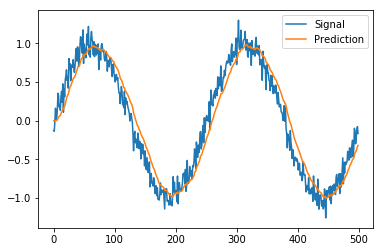

In [52]:
from math import sin

# Sample data
def signal(i):
    return sin(0.025 * i) + np.random.normal(0, 0.1)

measurements = [signal(i) for i in range(n_iterations)]

n_iterations = 500
predictions = np.zeros(n_iterations)
for i in range(1, n_iterations):
    predictions[i] = KF.predict(measurements[i])
    
plt.plot(range(n_iterations), measurements, label='Signal')    
plt.plot(range(n_iterations), predictions, label="Prediction")
plt.legend()
plt.show()